# IMPORT DEPENDENCIES

In [1]:
!pip install joblib

In [2]:
#Import libraries for data handling and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Import libraries for feature engineering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
#Import metrics for the model evaluation
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score,f1_score,roc_auc_score

In [5]:
#Import Libraries for training models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier

In [6]:
#Import library for saving models
import joblib

# DATA HANDLING

In [7]:
df = pd.read_csv('CareerMap.csv')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Database Fundamentals            9179 non-null   int64  
 1   Computer Architecture            9179 non-null   int64  
 2   Distributed Computing Systems    9179 non-null   int64  
 3   Cyber Security                   9179 non-null   int64  
 4   Networking                       9179 non-null   int64  
 5   Software Development             9179 non-null   int64  
 6   Programming Skills               9179 non-null   int64  
 7   Project Management               9179 non-null   int64  
 8   Computer Forensics Fundamentals  9179 non-null   int64  
 9   Technical Communication          9179 non-null   int64  
 10  AI ML                            9179 non-null   int64  
 11  Software Engineering             9179 non-null   int64  
 12  Business Analysis   

Checking the meta-data of the dataframe

In [9]:
df.nunique()

Database Fundamentals                7
Computer Architecture                7
Distributed Computing Systems        7
Cyber Security                       7
Networking                           7
Software Development                 7
Programming Skills                   7
Project Management                   7
Computer Forensics Fundamentals      7
Technical Communication              7
AI ML                                7
Software Engineering                 7
Business Analysis                    7
Communication skills                 7
Data Science                         7
Troubleshooting skills               7
Graphics Designing                   7
Openness                           218
Conscientousness                   218
Extraversion                       218
Agreeableness                      218
Emotional_Range                    218
Conversation                       217
Openness to Change                 218
Hedonism                           218
Self-enhancement         

In [10]:
#Make a new dataframe consisting of only the categorical columns of the dataframe
categorical_df = df.select_dtypes("object").columns

#Use a loop to label encoded every value in the categorical dataframe
le = LabelEncoder()
for col in categorical_df:
    data = df[col].unique().tolist()
    encoded = le.fit_transform(df[col])

#Create a dataframe from the encoded values
encoded_df = pd.DataFrame(encoded, columns = [col])    

#Create a dictionary to store the encoded vales and their original values
Category_mapping = dict(zip(encoded,df['Role']))

#Replacing the columns with categorical values in the original dataframe with the new encoded values
df.drop(col,axis =1, inplace = True)
df = pd.concat([df,encoded_df], axis = 1)

This handles categorical columns by label encoding them and adding them to the original dataframe

In [11]:
Category_mapping

{6: 'Database Administrator',
 8: 'Hardware Engineer',
 2: 'Application Support Engineer',
 5: 'Cyber Security Specialist',
 11: 'Networking Engineer',
 13: 'Software Developer',
 1: 'API Specialist',
 12: 'Project Manager',
 10: 'Information Security Specialist',
 15: 'Technical Writer',
 0: 'AI ML Specialist',
 14: 'Software tester',
 3: 'Business Analyst',
 4: 'Customer Service Executive',
 9: 'Helpdesk Engineer',
 7: 'Graphics Designer'}

This is a dictionary that shows the field of specialization and the encoded value representing that field

In [12]:
 training_df = df.drop(['Openness','Openness to Change','Extraversion','Emotional_Range','Conversation','Hedonism','Self-enhancement','Self-transcendence','Conscientousness','Agreeableness','Communication skills','Business Analysis'],axis = 1)

This creates a new dataframe by dropping superfluous columns from the original

In [13]:
df.var()

Database Fundamentals               3.423990
Computer Architecture               3.423990
Distributed Computing Systems       3.423990
Cyber Security                      3.423990
Networking                          3.423990
Software Development                3.423990
Programming Skills                  3.423990
Project Management                  3.423990
Computer Forensics Fundamentals     3.423990
Technical Communication             3.423990
AI ML                               3.423990
Software Engineering                3.423990
Business Analysis                   3.423990
Communication skills                3.423990
Data Science                        3.423990
Troubleshooting skills              3.423990
Graphics Designing                  3.423382
Openness                            0.006166
Conscientousness                    0.014984
Extraversion                        0.020267
Agreeableness                       0.009276
Emotional_Range                     0.009432
Conversati

This shows the variance of each column in the dataframe

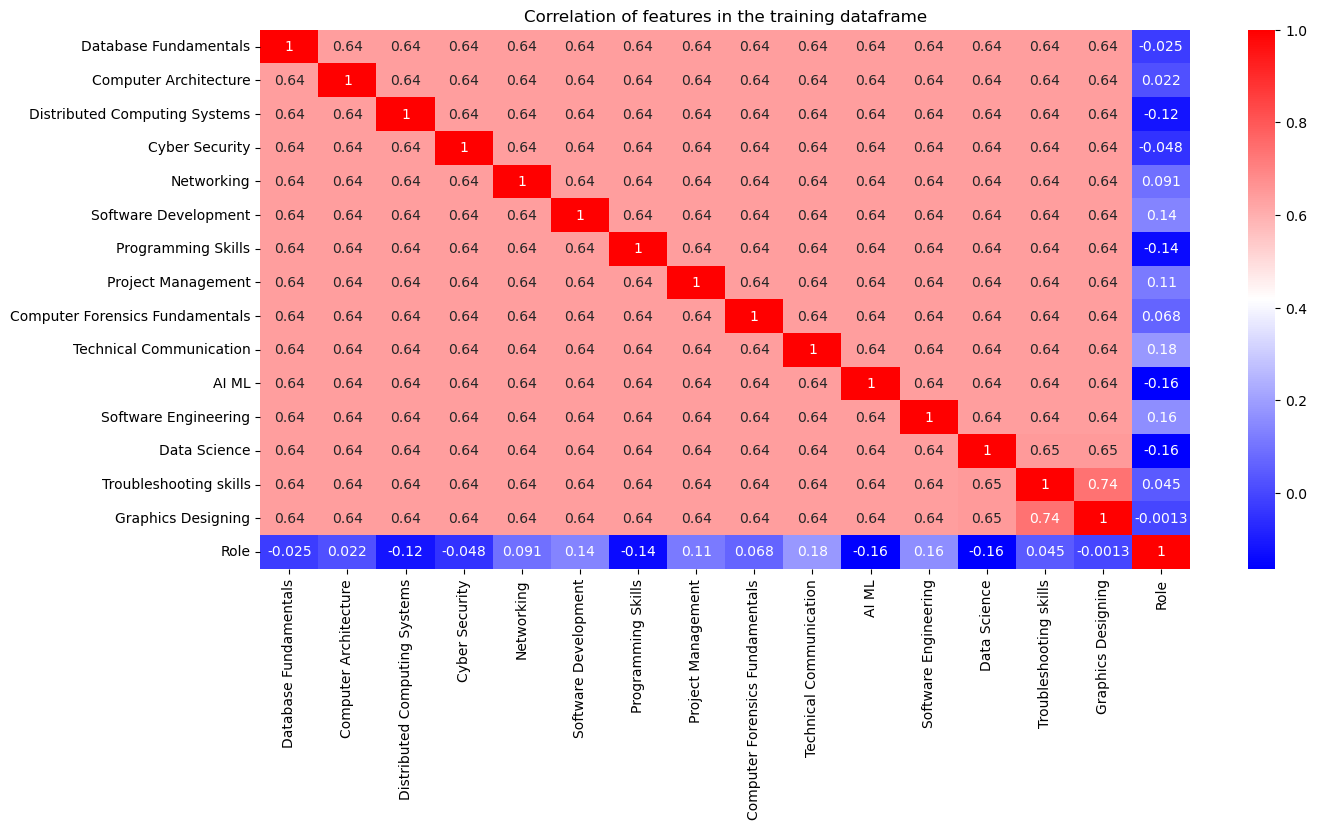

In [14]:
plt.figure(figsize = (15,7))
plt.title('Correlation of features in the training dataframe')
sns.heatmap(training_df.corr(), annot = True,cmap = 'bwr')
plt.show()

The visualization above shows the correlation of each feature with every other feature in the dataframe. 

This heatmap points out that there is heavy and identical correlation between all the non-target features, which is most likely due to them being gathered with a questionnaire

# FEATURE SELECTION AND ENGINEERING

In [15]:
#Splitting the data into non-target and target features
X = df.drop('Role',axis = 1)
y = df['Role']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Splitting and Scaling the data to make them more suitable for the models

In [16]:
pca = PCA()
pca.fit(X_train)

PCA()

Fitting the PCA function with the training data to extract the explained variance ratio

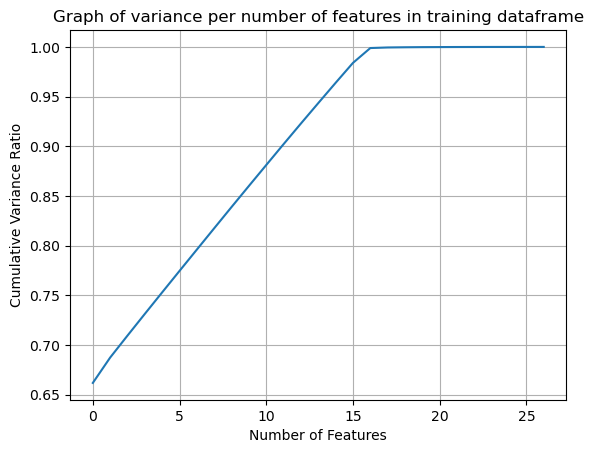

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(visible = True)
plt.title("Graph of variance per number of features in training dataframe")
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Variance Ratio")
plt.show()

The graph above shows the number of features responsible for the amount of variance in the dataframe. It shows there is 100% variance with the maximum number of features in the dataframe, meaning that every feature in the dataframe is relevant and provides useful information. 

# MODEL TRAINING

In [18]:
# 2. Define base models
models = {
    'svm': SVC(kernel='rbf', probability=True, random_state=42, max_iter=1000),
    #'knn' : KNeighborsClassifier(n_neighbors=5),
    'DT': DecisionTreeClassifier(),
    'Nb': GaussianNB(),
    'rfc': RandomForestClassifier()
}


base_models = {
    ('svm', SVC(kernel='rbf', probability=True, random_state=42, max_iter=1000)),
    #('knn', KNeighborsClassifier(n_neighbors=5)),
    ('DT', DecisionTreeClassifier()),
    ('Nb', GaussianNB()),
    ('rfc', RandomForestClassifier())
    
}

Initalizing the prospective models and storing them in both a list and a dictionary

In [19]:
#3. Define meta-model
meta_model = LogisticRegression()

# 4. Create stacking classifier
stacking_classifier = StackingClassifier(
    estimators=list(base_models),
    final_estimator=meta_model,
    #cv=5,  # number of folds for cross-validation
    stack_method='predict_proba'  # use probability predictions from base models
)

# 5. Train the stacking classifier
stacking_classifier.fit(X_train_scaled, y_train)


KeyboardInterrupt: 

Creating the ensemble model using the stacking methos which consists of the following models:
1. RandomF Forest Classifier
2. Decision Tree Classifier
3. Support Vector Machines Classifier
4. Gaussian Naive Bayes Classifier
5. Logistic Regression

# MODEL EVALUATION

In [22]:
X_test['Role']

KeyError: 'Role'

In [ ]:
# 6. Make predictions
y_pred = stacking_classifier.predict(X_test_scaled)

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")

Testing the ensemble model's accuracy

In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred,average='weighted'),
        'Recall': recall_score(y_test, y_pred, average = 'weighted'),
        'F1 Score': f1_score(y_test, y_pred, average = 'weighted')
    }
    


Testing the metrics of each model and storing them in a dictionary

In [ ]:
results_df = pd.DataFrame(results).T

Converting the transpose of the dictionary containing the results of the metrics test of each model in a dataframe 

In [ ]:
# Create a bar plot with all metrics
plt.figure(figsize=(12, 6))

# Get the metrics and models
metrics = results_df.columns
model_index = results_df.index
x = np.arange(len(models))
width = 0.15  # Width of bars
multiplier = 0

# Plot each metric as a group of bars
for metric in metrics:
    offset = width * multiplier
    plt.bar(x + offset, results_df[metric], width, label=metric)
    multiplier += 1

# Customize the plot
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x + width * 2, models, rotation=45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

A plot showing the performance of each model in all metrics. This shows that all model performed similarly on the test data

In [ ]:
# Bar plot of accuracies
plt.figure(figsize=(15, 4))

plt.subplot(141)
sns.barplot(x = results_df.index,y = results_df['Accuracy'])
plt.xticks(rotation=45)
plt.title('Model Accuracies Comparison')
plt.tight_layout()

# Bar plot of precision
plt.subplot(142)
sns.barplot(x = results_df.index, y = results_df['Precision'])
plt.xticks(rotation=45)
plt.title('Model Precision Comparison')
plt.tight_layout()
plt.show()



plt.figure(figsize=(15, 4))

plt.subplot(143)
sns.barplot(x = results_df.index,y = results_df['Recall'])
plt.xticks(rotation=45)
plt.title('Model Recall Comparison')
plt.tight_layout()

# Bar plot of precision
plt.subplot(144)
sns.barplot(x = results_df.index, y = results_df['F1 Score'])
plt.xticks(rotation=45)
plt.title('Model F1 Score Comparison')
plt.tight_layout()
plt.show()


Visualizations of the performance of the models in each individual metric

In [ ]:
plt.figure(figsize = (15,6))
plt.title("Heatmap of the Model's prediction accuracy")
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True,cmap = 'viridis')
plt.show()

The confusion matrix above visualizes the results of the model predicting the "y_test" variables. The diagonal line represents True Positives and everything else represents False Positives

In [ ]:
#Save cleaned dataset
training_df.to_csv('CleanedData.csv')

# SAVE MODEL

In [ ]:
import pickle

# Save
with open('EnsembleModel.pkl', 'wb') as f:
    pickle.dump(stacking_classifier, f)